<a href="https://colab.research.google.com/github/SampathPatil0/DSML_Projects/blob/main/Aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics & Probability**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2023-03-09 12:48:37--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.210, 18.172.139.46, 18.172.139.61, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-03-09 12:48:37 (109 MB/s) - ‘aerofit.csv’ saved [7279/7279]



In [ ]:
data = pd.read_csv('aerofit.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# **Problem Statement**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories.
Aerofit team wants to understand the characteristics of their target audience so that they can provide better recommendations to new customers, basically they wanted to know which category of customers tend to buy which range of fitness equipments based on certain attributes like gender, usage, income and so on. We also need to provide insights and recommendations based on the data which will help Aerofit to take certain business decisions.

# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

Checking the top 5 values

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Overview of statistical summary of categorical and continous featutes

In [ ]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Checking the shape of the data

In [ ]:
data.shape

(180, 9)

Checking the dimension

In [ ]:
data.ndim

2

Checking the data types

In [ ]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Overview of other information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Non-Graphical Analysis: Value counts and unique attributes

Checking the unique products of the product

In [ ]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Cjecking the unique values of MaritalStatus

In [ ]:
data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

Checking the unique values of gender

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Checking the unique values in age

In [ ]:
data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

Checking the unique values in usage

In [ ]:
data['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

Count of Gender values: Males are the top buyers of treadmill

In [ ]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Count of Usage: People who use treadmill 3 days in a week are highest in number

In [ ]:
data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Statistical summary of continous features

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Visual Analysis- Univariate & Bivariate

For Continous variables

Distribution of Age : Based on the below graph, I can say that most of the treadmill users fall under the age bracket of 24-29

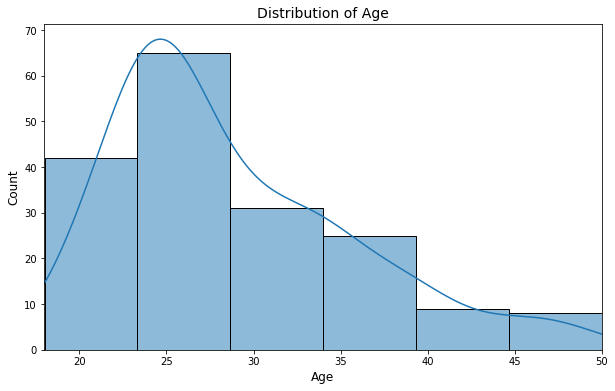

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'],bins=6,kde=True)
plt.xlim(17.96,50)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Distribution of Age',fontsize=14)
plt.show()

Distribution of Income: Based on the below graph, I can say that most of the users income fall between the bracket 40,000 to 62,000

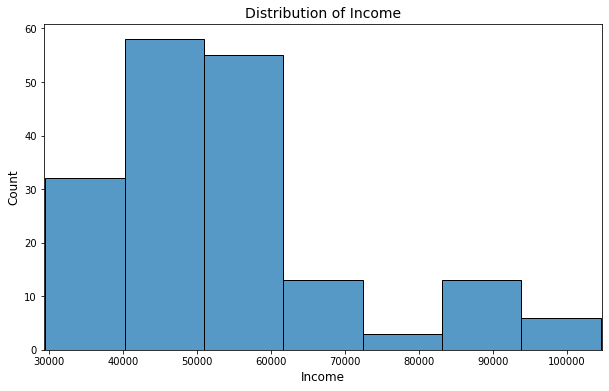

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Income',bins=7)
plt.xlim(29336,104750)
plt.xlabel('Income',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Distribution of Income',fontsize=14)
plt.show()

Count of Each Products : KP281 which is entry level treadmill which has highest count

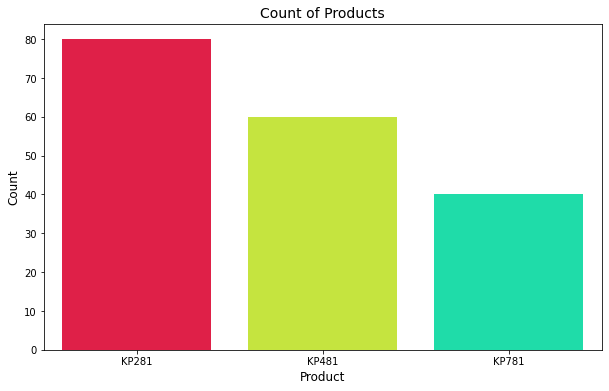

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Product',palette='gist_ncar_r')
plt.xlabel('Product',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count of Products',fontsize=14)
plt.show()

Gender wise Products: A lot of male customers tend to buy KP781 which is the costliest treadmill.

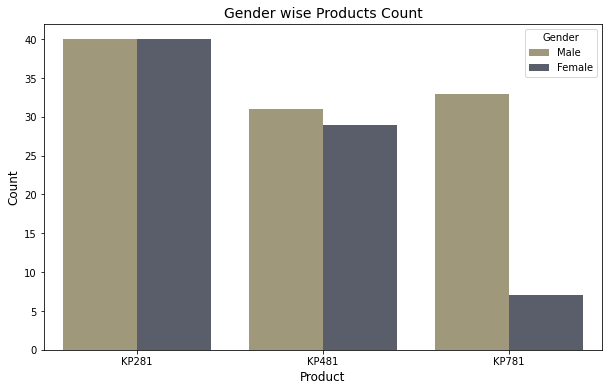

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Product',hue='Gender',palette='cividis_r')
plt.xlabel('Product',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Gender wise Products Count',fontsize=14)
plt.show()

MaritalStatus wise Products: In all the three products couples tend to be the highest buyers compared to Singles.

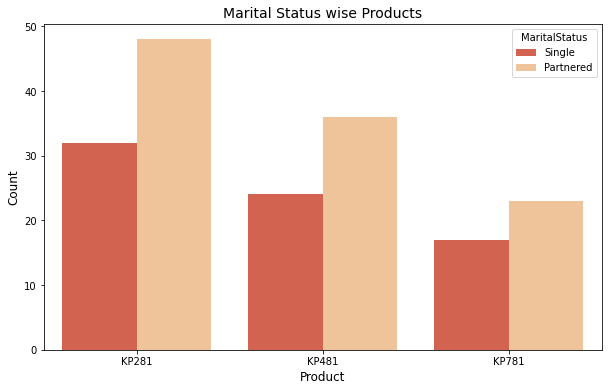

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Product',hue='MaritalStatus',palette='OrRd_r')
plt.xlabel('Product',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Marital Status wise Products',fontsize=14)
plt.show()

Distribution of Miles

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


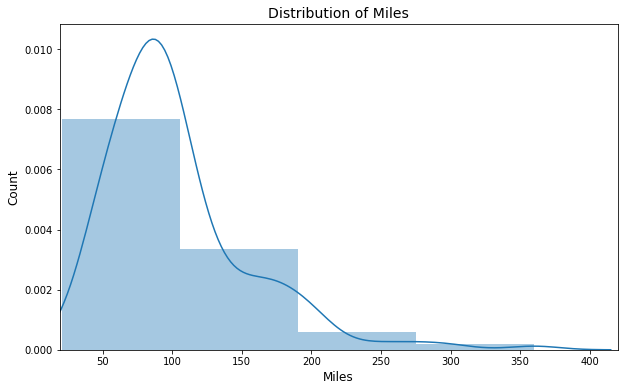

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data['Miles'],bins=4)
plt.xlim(19,420)
plt.xlabel('Miles',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Distribution of Miles',fontsize=14)
plt.show()

For categorical variables

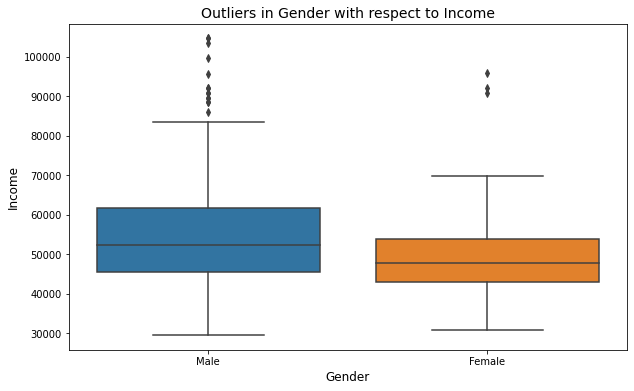

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Gender',y='Income')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Income',fontsize=12)
plt.title('Outliers in Gender with respect to Income',fontsize=14)
plt.show()

Correlation of all the features:


*   Miles to Fitness there is 0.79% correlation which means people who walk alot are more fitness freak
*   Miles to Ugase has 0.76% correlation which means people who walk alot and cover more miles are tend to use a treadmill alot.


*   Usage is directly proportional to fitness and miles, when the usage is more then probably the users tend to walk more and they are fitness freaks. We can also interpret this as higher the usage higher is the fitness and miles.





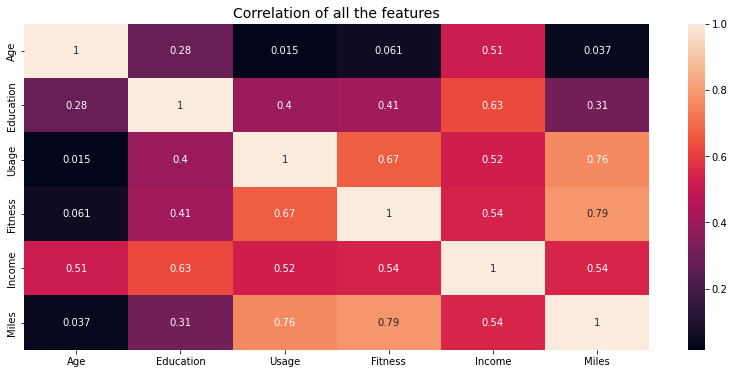

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation of all the features',fontsize=14)
plt.show()

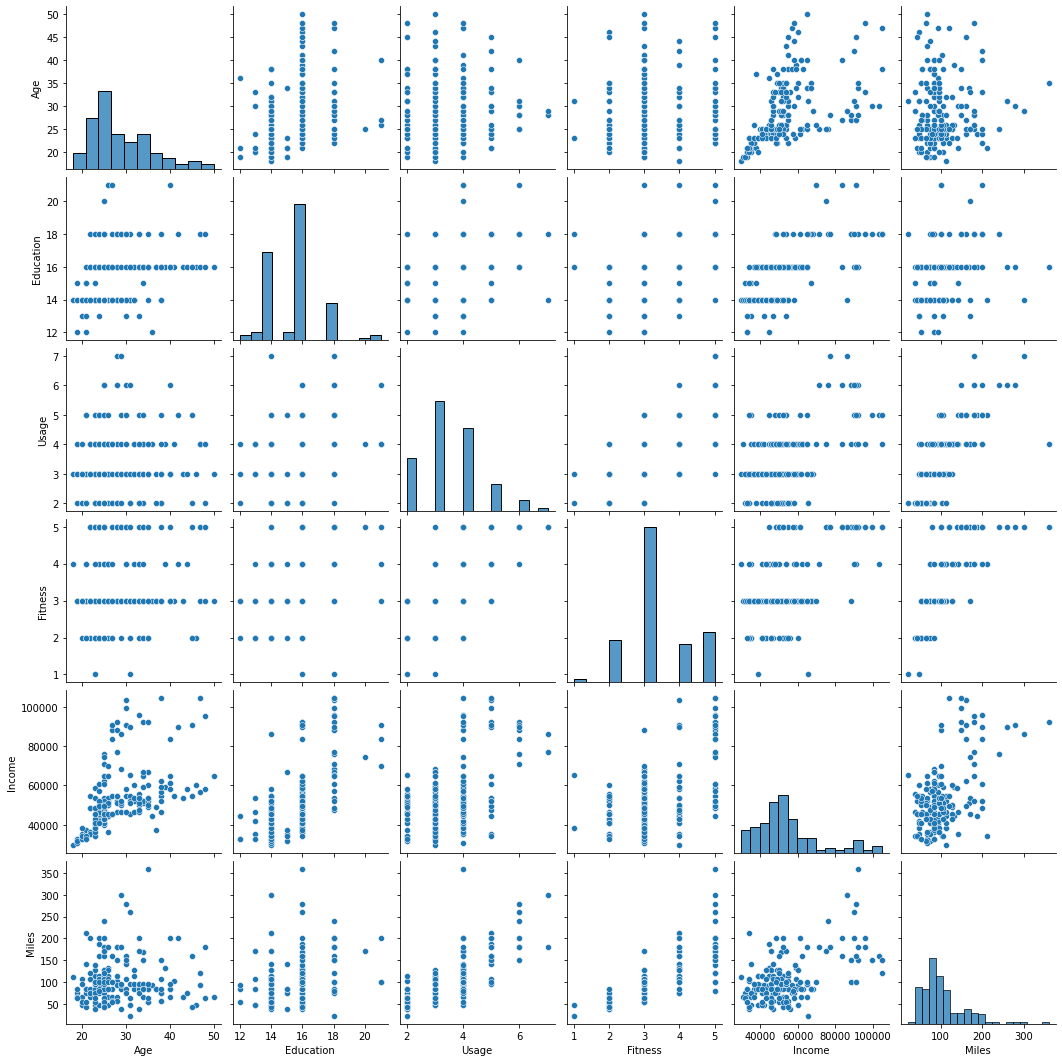

In [ ]:
sns.pairplot(data)

# Missing Value and Outlier Detection

Checking for missing values : Based on the below data we can say that there are no null values and data seems to be already cleaned

In [ ]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Based on below graphs it is more clear that Age, Education and Usage has less outliers where as Income and Miles are having more outliers.

Outliers in Income

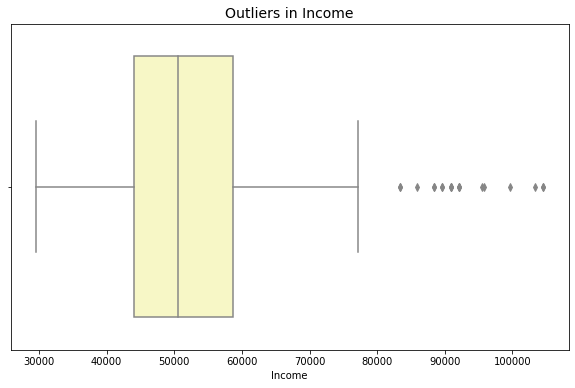

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Income'],palette='Spectral')
plt.title('Outliers in Income',fontsize=14)
plt.show()

Outliers in Age

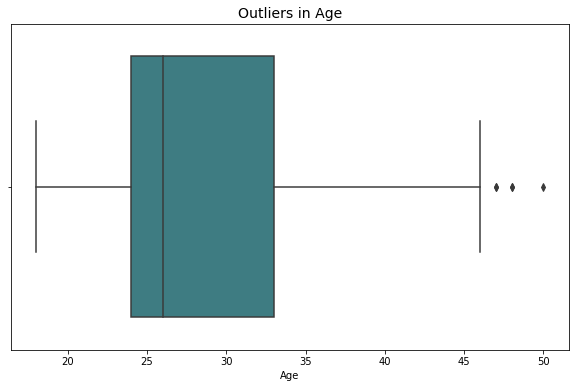

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Age'],palette='crest')
plt.title('Outliers in Age',fontsize=14)
plt.show()

Outliers in Education

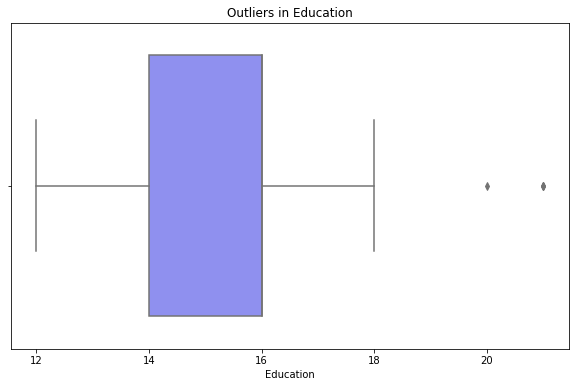

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Education'],palette='cool_r')
plt.title('Outliers in Education')
plt.show()

Outliers in Usage

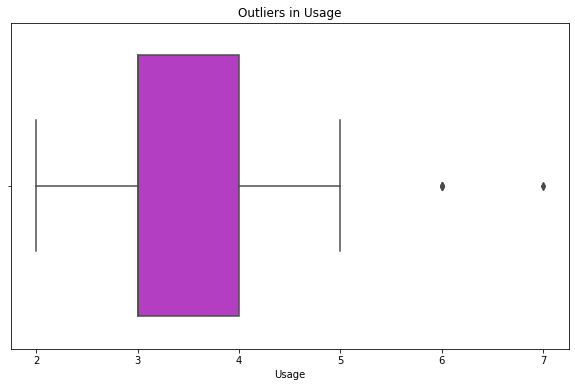

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Usage'],palette='gnuplot2_r')
plt.title('Outliers in Usage')
plt.show()

Outliers in Miles

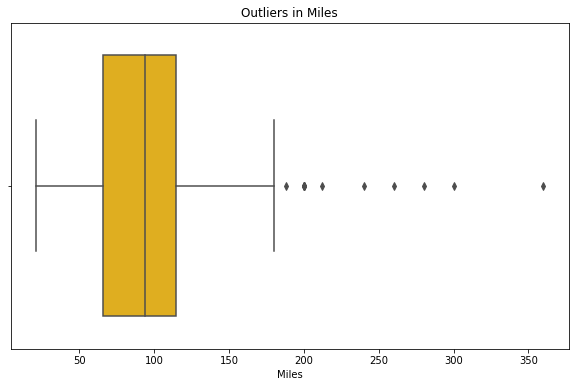

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Miles'],palette='Wistia_r')
plt.title('Outliers in Miles')
plt.show()

Outliers in Fitness

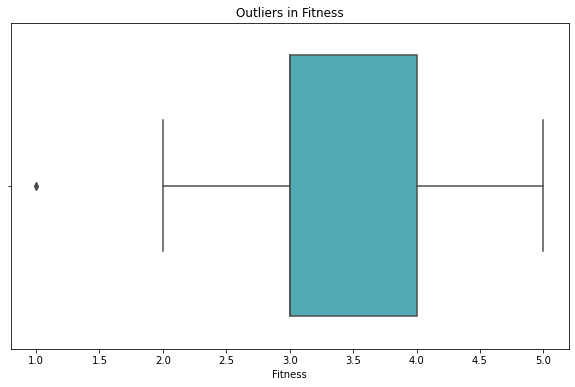

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Fitness'],palette='YlGnBu')
plt.title('Outliers in Fitness')
plt.show()

Difference between Mean and Median of Age

In [ ]:
round(data['Age'].mean() - data['Age'].median(),2)

2.79

Difference between Mean and Median of Education

In [ ]:
round(data['Education'].mean() - data['Education'].median(),2)

-0.43

Difference Mean and Median of Fitness

In [ ]:
round(data['Fitness'].mean() - data['Fitness'].median(),2)

0.31

# Marginal Probability

Marginal Probability with respect to Gender and Product

In [ ]:
pd.crosstab(index=data['Gender'],columns=data['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180




*   Based on the below data, 58% of Males are treadmill buyers
*   Both Male and Female tend to buy the basic treadmill which is KP281 contributing 22%


*   Probability of Females buying KP481 is 16%
*   Probability of Females buying KP781 is only 4%


*   Probability of Males buying KP481 is 17%
*   Probability of Female buying KP781 is 18% which is 2x of 4.25% more than that of Females








In [ ]:
pd.crosstab(index=data['Gender'],columns=data['Product'],margins=True,normalize=True).round(2) * 100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.0,16.0,4.0,42.0
Male,22.0,17.0,18.0,58.0
All,44.0,33.0,22.0,100.0


Marginal Probability with respect to Marital Status and Product

In [ ]:
pd.crosstab(index=data['MaritalStatus'],columns=data['Product'],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180




*   Probability of couples buying KP281 is 27%
*   Probability of couples buying KP481 is 20%


*   Probability of couples buying KP781 is 13%
*   Probability of Single buying KP281 is 18%


*   Probability of Single buying KP481 is 13%
*   Probability of Single buying KP781 is 9%







In [ ]:
pd.crosstab(index=data['MaritalStatus'],columns=data['Product'],margins=True,normalize=True).round(2) * 100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,27.0,20.0,13.0,59.0
Single,18.0,13.0,9.0,41.0
All,44.0,33.0,22.0,100.0


# Conditional Probability



*   Based on the below data we can come into the conclusion that whenever a Female enters into the shop then there is 53% of chances that she is going to buy KP281 and whenever a Male enters into the shop then there is 38% of chance that he is going to buy KP281 and 32% of chance that he is going to buy KP781



In [ ]:
pd.crosstab(index=data['Gender'],columns=data['Product'],margins=True,normalize='index').round(2) * 100

Product,KP281,KP481,KP781
Gender,,,
Female,53.0,38.0,9.0
Male,38.0,30.0,32.0
All,44.0,33.0,22.0


Based on the below data we can come into conclusion that whenever a Partnered and Single enter the shop they tend to buy KP281 which is the entry level treadmill

In [ ]:
pd.crosstab(index=data['MaritalStatus'],columns=data['Product'],margins=True,normalize='index').round(2) * 100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,45.0,34.0,21.0
Single,44.0,33.0,23.0
All,44.0,33.0,22.0


# Business Insights based on Non-Graphical and Visual Analysis

Customer Profiling

KP281 Customer Profile


*   There is a higher chance that this product might sold faster
*   Less to medium earning users


*   Customers who educated under 16 years most preferable
*   Fitness level mostly under 3


*   Females who Partnered most chance than Females who are single







KP481 Customer Profile


*   This is second most popular product
*   Fitness level mostly under 3


*   Less to medium earning users
*   This is similar to that of KP281 but KP281 has wide range of users


*   Male customers who partnered prefer more than Male customers who single






KP781 Customer Profile


*   Mostly preferred by Male customers
*   Usage more than 120 miles per week


*   Fitness level more than 3
*   Usage more than 4 days in week


*   High salaried customers







# Comments on range of attributes, distribution of variables, univariate and bivariate plots (I have also provided insights across each of my header at the top)




*   KP281 brings the highest revenue and KP481 and KP781 falls next to it.
*   Customers whose education is greater than 16 have more chances of purchasing KP781 product
*   Customers with education less than 16 have equal chances of purchasing KP281 and KP481
*   Customers who tend to walk use treadmill more than 4 times a week are tend to buy KP781
*   Customers with higher salary will buy KP781
*   Customer who tend to walk more than 120 miles per week is more likely to buy KP781
*   Females who use treadmill 3-4 times in a week are more likely to buy KP481





